## Lab | Inferential statistics


### Instructions

It is assumed that the mean systolic blood pressure is `μ = 120 mm Hg`. In the Honolulu Heart Study, a sample of `n = 100` people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

   - Set up the hypothesis test.
   - Write down all the steps followed for setting up the test.
   - Calculate the test statistic by hand and also code it in Python. It should be 4.76190. We will take a look at how to make decisions based on this calculated value.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

**Hypothesis test**  
$H_0 : \mu = 120 mm Hg$

$H_1 : \mu \neq 120 mm Hg$ --> ***Therefore, is a 2-tailed test***

$\alpha = 0.05$  
confidence_level = 0.095

We do not know the population standard deviation, so we use One-sample t-test formula:

$$ t =  \frac{\bar{x}-\mu}{\frac{s}{\sqrt{n}}}$$

$\bar{x}$ = sample's mean  
$\mu$ = population’s mean  
${s}$ = standard deviation of the sample  
${n}$ = number of observations in the sample.

In [3]:
confidence_level = 0.95
alpha = 0.05
population_mean = 120
sample_mean = 130.1
sample_std_dev = 21.21
sample_size = 100
degrees_of_freedom = sample_size-1 #also named dof

In [4]:
t_stat = (sample_mean - population_mean) / (sample_std_dev / sample_size**0.5)
t_stat

4.761904761904759

In [6]:
p_value = (1 - st.t.cdf(t_stat, degrees_of_freedom))*2
p_value

6.562701817092176e-06

In [8]:
#Another way to compute the pvalue is using the Survival function 
#(also defined as 1 - cdf, but sf is sometimes more accurate).

p_value_sf = st.t.sf(abs(t_stat), df=degrees_of_freedom) * 2 
p_value_sf

6.562701817208617e-06

Note to remember the ppf parameters:

**Percent point function** (inverse of cdf).  

The arguments to `t.ppf`(q, dof, loc=0, scale=1)  

The `loc` (mean) and `scale` (standard deviation) arguments are optional, and default to 0 and 1, respectively.

In [12]:
lower_critical_value = st.t.ppf(0.05/2, degrees_of_freedom)
upper_critical_value = st.t.ppf(1-0.05/2, degrees_of_freedom)
lower_critical_value, upper_critical_value

(-1.9842169515086832, 1.9842169515086827)

***Results:***

Critical value: $1.98$  
T-statistic:    $4.76$  
P-value :       $6.56e^{-6}$

The t statistic is greater than the crital value; we are in the rejection zone.  
The p-value is much smaller than the significance level of 0.05.

Therefore, we reject the null hypothesis $H_0$

***The mean of the sample is significantly different from the regular population***

#### T-distribution with critical value plot

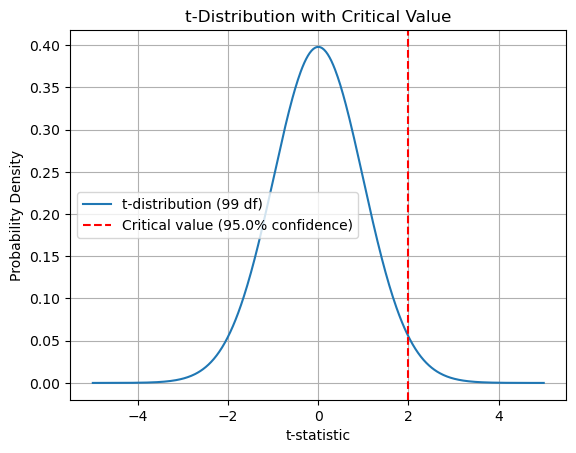

In [13]:
# Generate data points for the t-distribution
x = np.linspace(-5, 5, 500)
y = stats.t.pdf(x, df=degrees_of_freedom)

# Plot the t-distribution
plt.plot(x, y, label='t-distribution (99 df)')

# Highlight the critical value
plt.axvline(critical_value, color='red', linestyle='dashed', label=f'Critical value ({confidence_level * 100}% confidence)')

# Add labels and legend
plt.xlabel('t-statistic')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.title('t-Distribution with Critical Value')
plt.grid(True)
plt.show()
